In [10]:
set.seed(2017)

In [3]:
sigma=4
phi=NULL
phi[1:2]=c(1/3,1/2)
phi

[1] 0.3333333 0.5000000

##### number of data points

In [4]:
n=10000

In [11]:
ar.process=arima.sim(n,model=list(ar=c(1/3,1/2)), sd = 4)
ar.process[1:5]

[1] 4.087685 5.598492 3.019295 2.442354 5.398302

In [12]:
r=NULL
r[1:2]=acf(ar.process, plot=F)$acf[2:3]
r

[1] 0.6814103 0.7255825

In [13]:
acf(ar.process, plot=F)


Autocorrelations of series 'ar.process', by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.681 0.726 0.584 0.558 0.479 0.438 0.382 0.346 0.305 0.276 0.246 0.218 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
0.187 0.171 0.141 0.128 0.112 0.087 0.083 0.068 0.059 0.050 0.039 0.037 0.029 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
0.031 0.028 0.028 0.026 0.026 0.020 0.019 0.016 0.016 0.018 0.015 0.018 0.010 
   39    40 
0.012 0.007 

### matrix R

In [15]:
R=matrix(1,2,2)
R

1,1
1,1


In [16]:
R[1,2]=r[1]
R[2,1]=r[1]
R

1.0000000,0.6814103
0.6814103,1.0000000


### b-column vector on the right

In [17]:
b=matrix(r,nrow=2, ncol=1)
b

0.6814103
0.7255825


solve r,b

In [18]:
phi.hat=matrix(c(solve(R,b)[1,1], solve(R,b)[2,1]), 2, 1)
phi.hat

0.3490720
0.4877212


In [20]:
c0 = acf(ar.process, type='covariance', plot=F)$acf[1]
var.hat=c0*(1-sum(phi.hat*r))
var.hat

[1] 16.37169

### varaince estimation

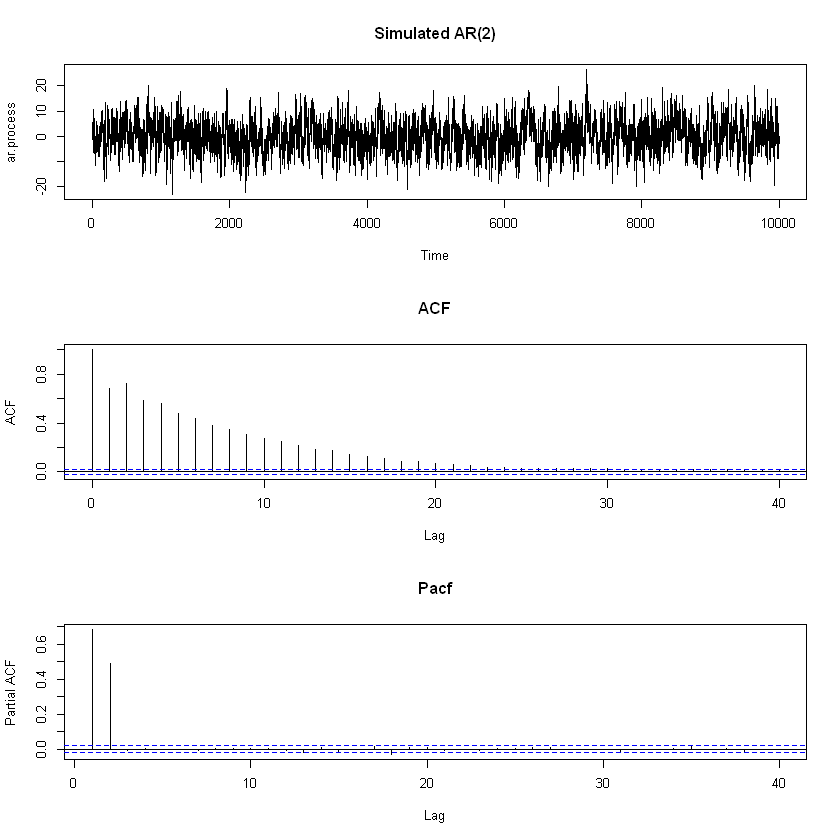

In [21]:
par(mfrow=c(3,1))
plot(ar.process, main='Simulated AR(2)')
acf(ar.process, main='ACF')
pacf(ar.process, main='Pacf')